In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/images/image_cat.jpg
/kaggle/input/images/toronjas.jpg
/kaggle/input/images/damaged_astronaut.png
/kaggle/input/images/face_det25.jpg
/kaggle/input/images/4.1.01.tiff
/kaggle/input/images/sally_damaged_image.jpg
/kaggle/input/images/steps_contours.png
/kaggle/input/images/building_image.jpg
/kaggle/input/images/face_det3.jpg
/kaggle/input/images/sevilleup(2).jpg
/kaggle/input/images/noise-noisy-nature.jpg
/kaggle/input/images/sally2.jpg
/kaggle/input/images/coffee.png
/kaggle/input/images/dices.png
/kaggle/input/images/r5.png
/kaggle/input/images/corners_building_top.jpg
/kaggle/input/images/image_aerial.tiff
/kaggle/input/images/chest_xray_image.png
/kaggle/input/images/face_det_friends22.jpg
/kaggle/input/images/madrid.jpg
/kaggle/input/images/bw.jpg
/kaggle/input/images/world_image_binary.jpg
/kaggle/input/images/shapes52.jpg
/kaggle/input/images/fruits-2.jpg
/kaggle/input/images/4.2.06_w_logo_2_2.png
/kaggle/input/images/miny.jpeg
/kaggle/input/images/dogs_banner.jpg


In [2]:
from skimage.feature import canny
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from skimage.feature import Cascade
from skimage import data

In [3]:
grapefruit=plt.imread("/kaggle/input/images/toronjas.jpg")
building_image=plt.imread("/kaggle/input/images/corners_building_top.jpg")
night_image=plt.imread("/kaggle/input/images/face_det3.jpg")
friends_image=plt.imread("/kaggle/input/images/face_det_friends22.jpg")
profile_image=plt.imread("/kaggle/input/images/face_det9.jpg")
group_image=plt.imread("/kaggle/input/images/face_det25.jpg")
damaged_image=plt.imread("/kaggle/input/images/sally_damaged_image.jpg")

In [4]:
def show_image(image,title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [5]:
def show_image_with_corners(image, coords, title="Corners detected"):
    plt.imshow(image, interpolation='nearest', cmap='gray')
    plt.title(title)
    plt.plot(coords[:, 1], coords[:, 0], '+r', markersize=15)
    plt.axis('off')
    plt.show()

# Finding the Edges with Canny

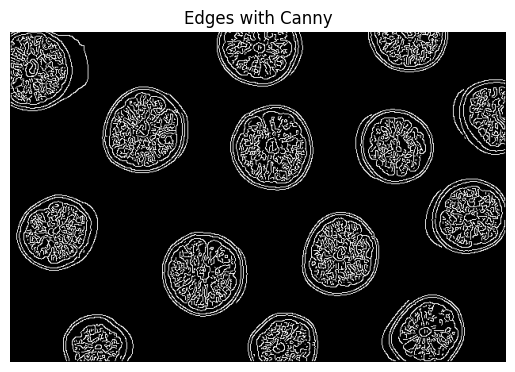

In [6]:
# Import the canny edge detector 
from skimage.feature import canny

# Convert image to grayscale
grapefruit = rgb2gray(grapefruit)

# Apply canny edge detector
canny_edges = canny(grapefruit)

# Show resulting image

show_image(canny_edges, "Edges with Canny")

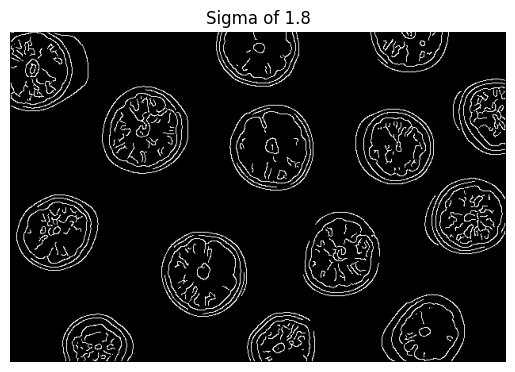

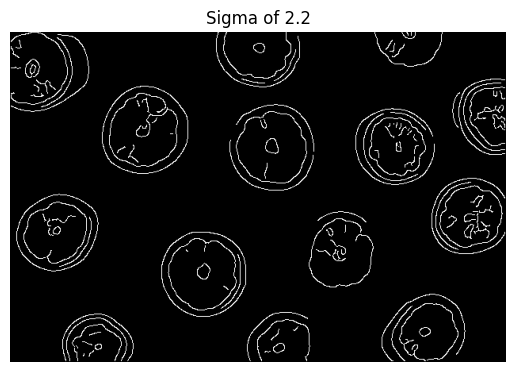

In [7]:
# Apply canny edge detector with a sigma of 1.8
edges_1_8 = canny(grapefruit, sigma=1.8)

# Apply canny edge detector with a sigma of 2.2
edges_2_2 = canny(grapefruit, sigma=2.2)

# Show resulting images
show_image(edges_1_8, "Sigma of 1.8")
show_image(edges_2_2, "Sigma of 2.2")

# Right Around the Corner

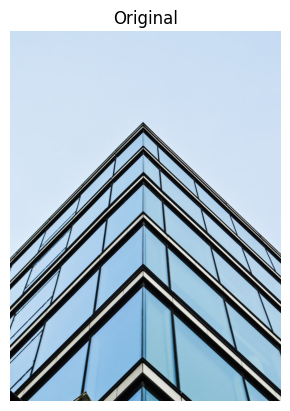

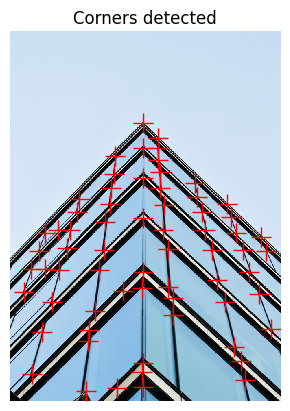

In [8]:
# Import the corner detector related functions and module
from skimage.feature import corner_harris, corner_peaks

# Convert image from RGB-3 to grayscale
building_image_gray = rgb2gray(building_image)

# Apply the detector  to measure the possible corners
measure_image = corner_harris(building_image_gray)

# Find the peaks of the corners using the Harris detector
coords = corner_peaks(measure_image, min_distance=20, threshold_rel=0.02)

# Show original and resulting image with corners detected
show_image(building_image, "Original")
show_image_with_corners(building_image, coords)

With a min_distance set to 10, we detect a total 89 corners in the image.
With a min_distance set to 60, we detect a total 20 corners in the image.


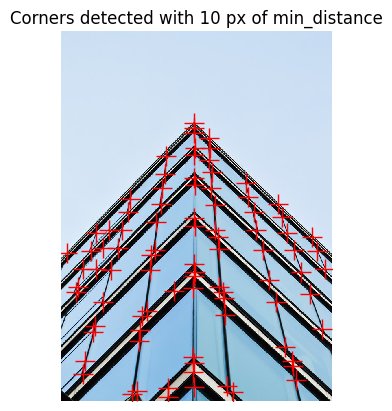

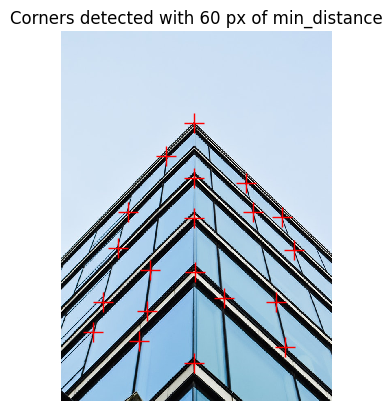

In [9]:
# Find the peaks with a min distance of 10 pixels
coords_w_min_10 = corner_peaks(measure_image, min_distance=10, threshold_rel=0.02)
print("With a min_distance set to 10, we detect a total", len(coords_w_min_10), "corners in the image.")

# Find the peaks with a min distance of 60 pixels
coords_w_min_60 = corner_peaks(measure_image, min_distance=60, threshold_rel=0.02)
print("With a min_distance set to 60, we detect a total", len(coords_w_min_60), "corners in the image.")

# Show original and resulting image with corners detected
show_image_with_corners(building_image, coords_w_min_10, "Corners detected with 10 px of min_distance")
show_image_with_corners(building_image, coords_w_min_60, "Corners detected with 60 px of min_distance")

# Face Detection

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def show_detected_face(result, detected, title="Face image"):
    plt.figure(figsize=(10, 10))
    plt.imshow(result, cmap='gray')
    plt.title(title)
    plt.axis('off')

    for patch in detected:
        rect = patches.Rectangle((patch['c'], patch['r']),
                                patch['width'], patch['height'],
                                fill=False, color='r', linewidth=2)
        plt.gca().add_patch(rect)

    plt.show()

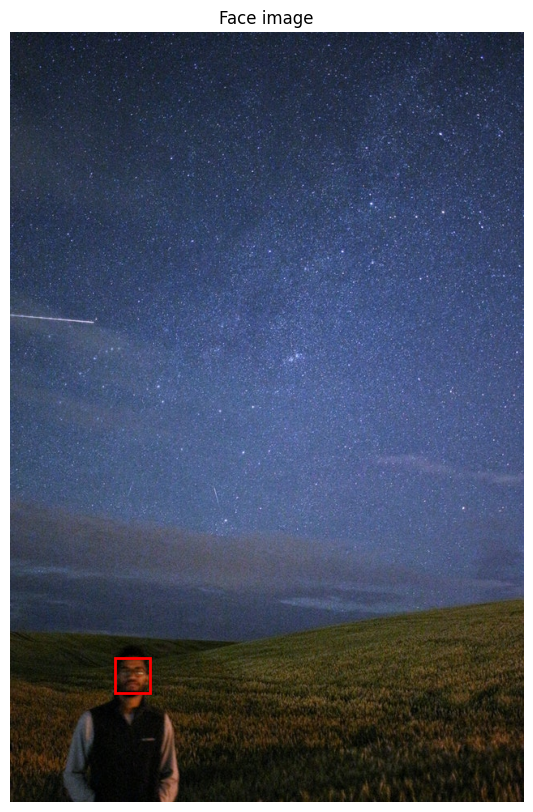

In [11]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with min and max size of searching window
detected = detector.detect_multi_scale(img = night_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10,10),
                                       max_size=(200,200))

# Show the detected faces
show_detected_face(night_image, detected)

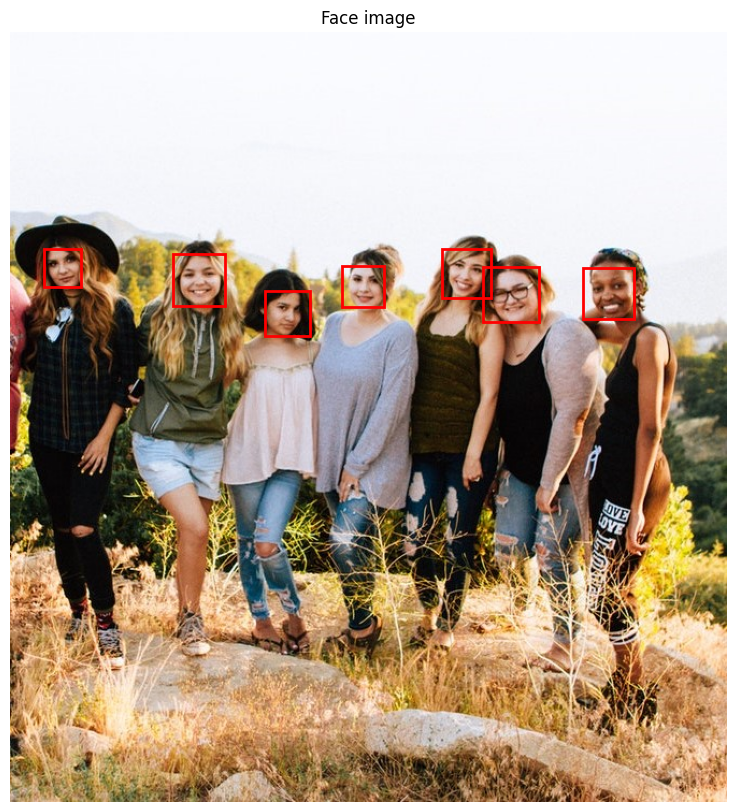

In [12]:
# Load the trained file from data
trained_file = data.lbp_frontal_face_cascade_filename()

# Initialize the detector cascade
detector = Cascade(trained_file)

# Detect faces with scale factor to 1.2 and step ratio to 1
detected = detector.detect_multi_scale(img=friends_image,
                                       scale_factor=1.2,
                                       step_ratio=1,
                                       min_size=(10, 10),
                                       max_size=(200, 200))
# Show the detected faces
show_detected_face(friends_image, detected)

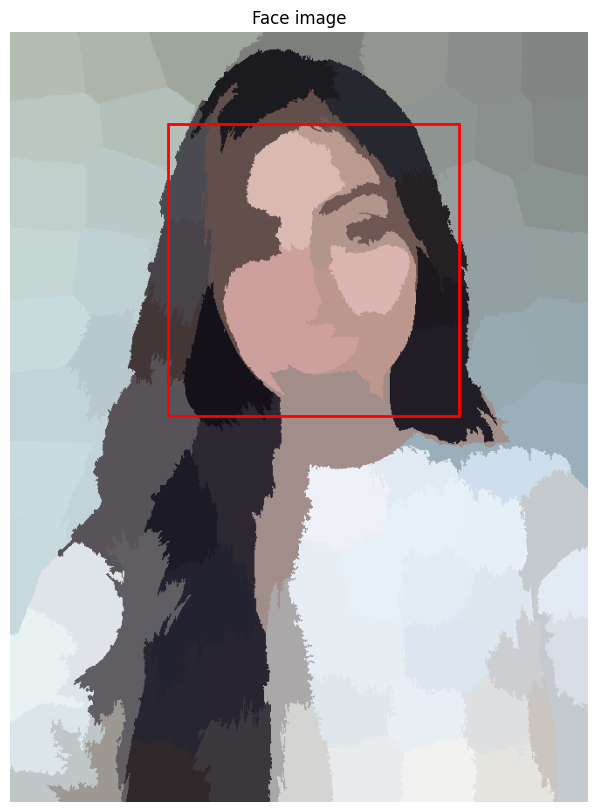

In [13]:
from skimage.segmentation import slic
from skimage.color import label2rgb

# Obtain the segmentation with default 100 regions
segments = slic(profile_image, n_segments=100, compactness=10)

# Obtain segmented image using label2rgb
segmented_image = label2rgb(segments, profile_image, kind='avg')

# Detect the faces with multi scale method
detected = detector.detect_multi_scale(img=segmented_image, 
                                       scale_factor=1.2, 
                                       step_ratio=1, 
                                       min_size=(10, 10), max_size=(1000, 1000))

# Show the detected faces
show_detected_face(segmented_image, detected)